# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib. 

First thing, Import all the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [5]:
# next load the data
df = pd.read_csv('final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,1


In [6]:
# check the shape of the dataset
df.shape

(1863, 14)

## Linear Regression Model

In [7]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [8]:
# seperate input features in x
x = df.drop('price', axis=1)

# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [10]:
# import module train test split
from sklearn.model_selection import train_test_split

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [15]:
# check the split using shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1490, 13), (1490,), (373, 13), (373,))

In [16]:
# train your model
lrmodel = LinearRegression().fit(x_train,y_train)

# make preditions on train set
train_pred = lrmodel.predict(x_train)


In [17]:
# check the coefficients and intercept
lrmodel.coef_

array([ 7.92898177e+03, -4.22689266e+02,  2.24606761e+03,  3.64530650e+03,
        7.46225466e+03,  2.81854446e+01,  4.39746517e+03,  1.69254225e-01,
       -1.00734187e+04, -7.90752462e+03, -4.98164171e+04,  3.53151659e+03,
       -2.85853946e+04])

In [18]:
# import MAE for evaluating the model
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_pred, y_train)
print('Train error is', train_mae)

Train error is 87232.26681418625


In [19]:
# make predictions on test set
ypred = lrmodel.predict(x_test)

# evaluate the model
test_mae = mean_absolute_error(ypred, y_test)
print('Test error is', test_mae)

Test error is 82294.70229463263


## Decision Trees

In [21]:
# import Decision Tree model
from sklearn.tree import DecisionTreeRegressor# import Decision Tree model

In [22]:
# create an instane of the model
dt = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=567)

In [23]:
# train the model
dtmodel = dt.fit(x_train,y_train)

In [24]:
# make predictions on the test set
ytest_pred = dtmodel.predict(x_test)

In [25]:
# Evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)

print('Test error is', test_mae)

Test error is 63472.38563044902


## Plot the Tree

In [26]:
# get the features
dtmodel.feature_names_in_

array(['year_sold', 'property_tax', 'insurance', 'beds', 'baths', 'sqft',
       'year_built', 'lot_size', 'basement', 'popular', 'recession',
       'property_age', 'property_type_Condo'], dtype=object)

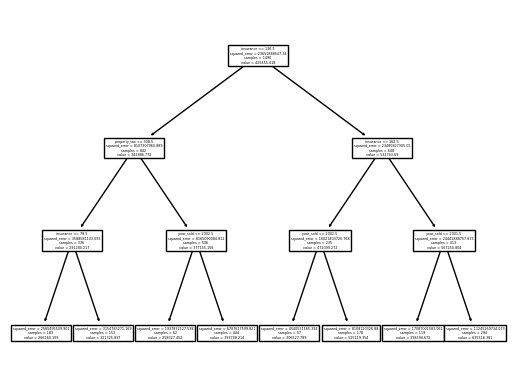

In [30]:
# plot the tree
from sklearn import tree

# Plot the tree with feature names
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)

#tree.plot_tree(dtmodel)
#plt.show(dpi=400)

# Save the plot to a file
plt.savefig('tree.png', dpi=400)

## Random Forest

In [31]:
# import Random Forest model
from sklearn.ensemble import RandomForestRegressor

In [32]:
# Create an instance of the model
rf = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

In [33]:
# train the model
rfmodel = rf.fit(x_train,y_train)

In [34]:
# make prediction on train set
ytrain_pred = rfmodel.predict(x_train)

In [35]:
# Make predictions on x_test values 
ytest_pred = rfmodel.predict(x_test)

In [36]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

42632.226970509386

# Saving your model

  ## Pickle: 

* The pickle module implements a powerful algorithm for serializing and de-serializing a Python object structure. 

* The saving of data is called Serialization, and loading the data is called De-serialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`. 
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.  

In [38]:
import pickle

In [39]:
# save the model
# Save the trained model on the drive 
pickle.dump(rfmodel, open('RE_Model','wb'))

In [40]:
# Load Model
RE_Model = pickle.load(open('RE_Model','rb'))

In [42]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[2012, 216, 74, 1 , 1, 618, 2000, 600, 1, 0, 0, 6, 0]])

/Users/isalah/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([255541.06])